# Questions
1. total # of twitts containing keywords(e.g. 'AI', 'Machine Learning', 'Acquisition', etc.)
2. Average # of that kind of twitts per company
3. Top-k companies 
4. bar charts
5. ...

In [1]:
import numpy as np
import pandas as pd
import os

KEYWORDS = {
    'AI': ['AI', 'Artificial Intelli' 'artificial intelli'],
    'ML': ['ML', 'Machine Learn', 'machine learn'],
    'Acquisition': ['acquisition', 'acquires', 'acquiring', 'acquired'],
    'Digital Trans': ['Digital Trans', 'digital trans']
}

csv_path = './data/'
csv_files = [f for f in os.listdir(csv_path) if f.endswith('.csv')]
print('number of companies: ', len(csv_files))

number of companies:  181


In [2]:
data = []
for file in csv_files:
    with open(csv_path + file) as f:
        data.append(pd.read_csv(f, header=0))
print('example data')
data[0].head(3)

example data


,created_at,full_text,lang,user_name
0,Thu Dec 19 23:01:17 +0000 2019,How are today’s companies navigating the drive...,en,Franklin Templeton
1,Thu Dec 19 20:00:11 +0000 2019,Find out what the hottest employee benefits fo...,en,Franklin Templeton
2,Thu Dec 19 18:01:05 +0000 2019,"Today, companies are faced with a number of sh...",en,Franklin Templeton


## 1. Count

In [3]:
def contains(text, substrs) -> bool:
    for s in substrs:
        if s in text:
            return True
    return False


In [4]:
total = 0
for df in data:
    total += len(df)
print('total # twitts: ', total)

total # twitts:  519650


In [5]:
from collections import defaultdict
import re

overall = defaultdict(int)
stats = defaultdict(lambda: defaultdict(int))
for df in data[:]:
    total = 0
    comp_name = df.loc[0, 'user_name']
#     print(comp_name)
    twitts = df.loc[:, 'full_text']
#     print(len(twitts))
#     print(twitts[0])
    for t in twitts:
        # remove links in t
        t = re.sub(r'https?:.*', '', t)
        for area, keywords in KEYWORDS.items():
            if contains(t, keywords):
#                 print(area, keywords)
#                 print(t)
                stats[comp_name][area] += 1
                overall[area] += 1
                stats[comp_name]['total'] += 1
                overall['total'] += 1

print('Some example in stats:\n')
print('company \t stats')
for i, (comp, counts) in enumerate(stats.items()):
    if comp != 'overall':
        print(comp, counts)
    if i > 5:
        break

print('*'*100)
print('Overall stats:')
for area, count in overall.items():
    if area != 'total':
        print(area, count)
print('total', overall['total'])
print()
print('Avg', overall['total']/len(data))
print('*'*100)

Some example in stats:

company 	 stats
Franklin Templeton defaultdict(<class 'int'>, {'ML': 3, 'total': 20, 'Digital Trans': 4, 'AI': 12, 'Acquisition': 1})
Biogen defaultdict(<class 'int'>, {'Acquisition': 4, 'total': 69, 'AI': 56, 'ML': 9})
CDW Corporation defaultdict(<class 'int'>, {'AI': 157, 'total': 190, 'Digital Trans': 8, 'Acquisition': 9, 'ML': 16})
Cintas Corporation defaultdict(<class 'int'>, {'ML': 9, 'total': 16, 'Acquisition': 4, 'AI': 3})
ExxonMobil defaultdict(<class 'int'>, {'AI': 8, 'total': 23, 'Digital Trans': 2, 'Acquisition': 9, 'ML': 4})
Allegion US defaultdict(<class 'int'>, {'AI': 54, 'total': 57, 'Acquisition': 3})
3M defaultdict(<class 'int'>, {'ML': 10, 'total': 15, 'Acquisition': 1, 'AI': 4})
****************************************************************************************************
Overall stats:
ML 2007
Digital Trans 696
AI 6002
Acquisition 910
total 9615

Avg 53.12154696132597
********************************************************************

## 2. Charts

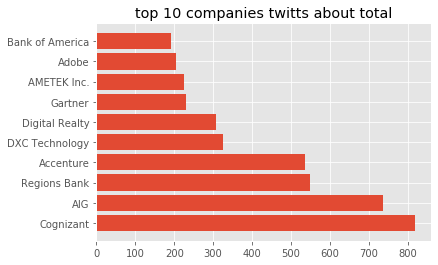

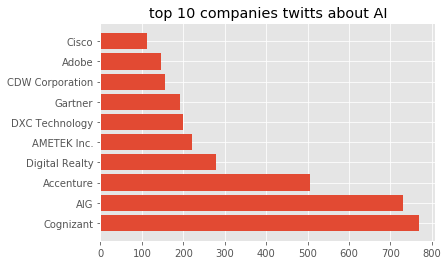

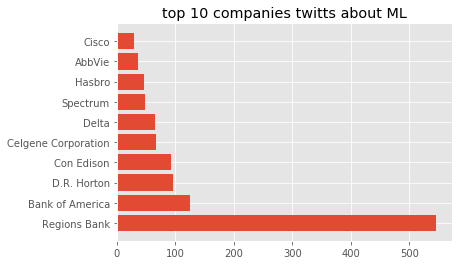

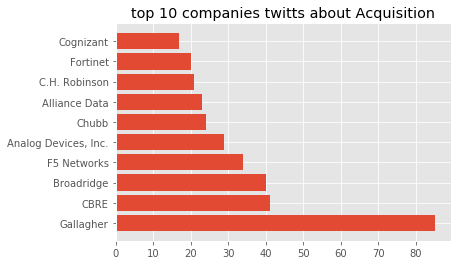

In [7]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

sort_by_total = sorted(stats.items(), key=lambda x: x[1]['total'], reverse=True)
sort_by_AI = sorted(stats.items(), key=lambda x: x[1]['AI'], reverse=True)
sort_by_ML = sorted(stats.items(), key=lambda x: x[1]['ML'], reverse=True)
sort_by_Acq = sorted(stats.items(), key=lambda x: x[1]['Acquisition'], reverse=True)

def plot_bar(comp_list, area):
    x = range(len(comp_list))
    y = [c[1][area] for c in comp_list]
    names = [c[0] for c in comp_list]
    plt.barh(x, y, tick_label=names)
    plt.title('top %d companies twitts about %s' %(len(x), area))
    plt.show()

# plot sort_by_total
plot_bar(sort_by_total[:10], 'total')
# plot sort_by_AI
plot_bar(sort_by_AI[:10], 'AI')
# plot sort_by_ML
plot_bar(sort_by_ML[:10], 'ML')
# plot sort_by_Acq
plot_bar(sort_by_Acq[:10], 'Acquisition')


## deprecated functions

In [14]:
from typing import List, Callable
from collections import defaultdict

def word_count(text: str) -> defaultdict(int):
    wc = defaultdict(int)
    words = text.split()
    for w in words:
        wc[w] += 1
    return wc

def remove_stopwords(text: str, stopwords: List[str]=None) -> str:
    words = text.split()
    return ' '.join([w for w in words if w not in stopwords])

def stemming(text: str, stem_func: Callable[[str], str]) -> str:
    return stem_func(text)
    

In [18]:
text = ' '.join(data[0].loc[:, 'full_text'])
len(text)

532024

In [19]:
wc = word_count(text)
wc

defaultdict(int,
            {'How': 84,
             'are': 397,
             'today’s': 18,
             'companies': 61,
             'navigating': 2,
             'the': 2549,
             'drivers': 10,
             'of': 1367,
             'change': 47,
             'using': 10,
             'ESG': 14,
             'considerations?': 1,
             'Our': 292,
             'Head': 79,
             'ESG,': 4,
             'Julie': 10,
             'Moret,': 4,
             'weighs': 73,
             'in:': 38,
             'https://t.co/ITJVV0ZjtF': 1,
             'https://t.co/UWTMk8790g': 1,
             'Find': 112,
             'out': 175,
             'what': 148,
             'hottest': 1,
             'employee': 9,
             'benefits': 18,
             'for': 735,
             '2020': 13,
             'will': 164,
             'be,': 2,
             'according': 53,
             'to': 1594,
             'experts.': 2,
             'Interesting': 5,
             'insi

In [24]:
print(sorted(wc.items(), key=lambda kv: kv[1], reverse=True)[:100])

[('the', 2549), ('to', 1594), ('of', 1367), ('in', 1227), ('a', 1094), ('and', 947), ('for', 735), ('on', 722), ('our', 574), ('Franklin', 511), ('is', 478), ('US', 448), ('are', 397), ('at', 380), ('Templeton', 371), ('be', 370), ('you', 304), ('more', 296), ('with', 295), ('Our', 292), ('from', 288), ('We', 279), ('this', 267), ('market', 262), ('about', 258), ('think', 253), ('#investing', 252), ('that', 245), ('why', 242), ('as', 242), ('#finserv', 238), ('have', 237), ('we', 233), ('&amp;', 226), ('Read', 223), ('has', 215), ('Fixed', 212), ('may', 211), ('it', 206), ('an', 201), ('Income', 199), ('RT', 195), ('could', 190), ('his', 190), ('The', 189), ('David', 176), ('out', 175), ('how', 173), ('some', 172), ('your', 172), ('Michael', 170), ('Global', 168), ('latest', 167), ('will', 164), ('Equity', 161), ('investment', 160), ('global', 158), ('can', 154), ('what', 148), ('markets', 148), ('see', 143), ('but', 141), ('Group’s', 133), ('not', 129), ('#FTIGEP:', 127), ('What', 122